In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
OD=pd.read_excel('Heathrow_OD.xlsx')
OD['Local Auth'] = OD['Local Auth'].astype(str)
OD_sorted=OD.sort_values(by=["Total Annual Demand"], ascending=False)
OD_taxi=OD['Total Annual Demand']*OD['Mode Share Taxi']
OD_car=OD['Total Annual Demand']*OD['Mode Share Car']
OD_rail=OD['Total Annual Demand']*OD['Mode Share Rail']
OD_sorted['Taxi'] = OD_taxi
OD_sorted['Car'] = OD_car
OD_sorted['Rail'] = OD_rail
OD_sorted.dropna()
OD_sorted

,Local Auth,Total Annual Demand,Mode Share Taxi,Mode Share Car,Mode Share Rail,Taxi,Car,Rail
346,Westminster,5592000.0,0.397034,0.059166,0.518132,2.220214e+06,330856.255457,2.897394e+06
164,Kensington and Chelsea,2296000.0,0.392059,0.062467,0.512345,9.001673e+05,143423.596311,1.176343e+06
51,Camden,1876000.0,0.324728,0.048311,0.612225,6.091896e+05,90632.237103,1.148535e+06
154,Hillingdon,1524000.0,0.345590,0.301655,0.095926,5.266792e+05,459722.627236,1.461913e+05
98,Ealing,1235000.0,0.349095,0.222143,0.383334,4.311323e+05,274346.808220,4.734175e+05
...,...,...,...,...,...,...,...,...
189,Merthyr Tydfil,1000.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
162,Isles of Scilly,1000.0,0.000000,1.000000,0.000000,0.000000e+00,1000.000000,0.000000e+00
198,Moray,0.0,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00
229,Pendle,0.0,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00


In [235]:
#Mapping Coordinates
coords=pd.read_excel("heathrowflow.xlsx", index_col=0)
coords= coords.dropna(axis=1, how='all')[['Local Auth', 'lat', 'lng']]
coords


,Local Auth,lat,lng
1,Aberdeen City,57.149889,-2.093753
2,Aberdeenshire,57.286872,-2.381568
3,Adur,50.834817,-0.310126
4,Allerdale,54.699064,-3.199420
5,Amber Valley,53.015187,-1.482307
...,...,...,...
358,Wychavon,52.152518,-2.033095
359,Wycombe,51.638511,-0.807860
360,Wyre,53.899610,-2.809301
361,Wyre Forest,52.403805,-2.253763


In [236]:
OD_sorted= pd.merge(coords, OD_sorted, on='Local Auth', how='right')
OD_sorted
#file_name = 'OD_with_coords.xlsx'
# saving the excel
#OD_sorted.to_excel(file_name)

,Local Auth,lat,lng,Total Annual Demand,Mode Share Taxi,Mode Share Car,Mode Share Rail,Taxi,Car,Rail
0,Westminster,51.497495,-0.135658,5592000.0,0.397034,0.059166,0.518132,2.220214e+06,330856.255457,2.897394e+06
1,Kensington and Chelsea,51.499080,-0.193825,2296000.0,0.392059,0.062467,0.512345,9.001673e+05,143423.596311,1.176343e+06
2,Camden,51.539026,-0.142552,1876000.0,0.324728,0.048311,0.612225,6.091896e+05,90632.237103,1.148535e+06
3,Hillingdon,51.535183,-0.448138,1524000.0,0.345590,0.301655,0.095926,5.266792e+05,459722.627236,1.461913e+05
4,Ealing,51.513254,-0.304314,1235000.0,0.349095,0.222143,0.383334,4.311323e+05,274346.808220,4.734175e+05
...,...,...,...,...,...,...,...,...,...,...
358,Merthyr Tydfil,51.748730,-3.381646,1000.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
359,Isles of Scilly,49.923252,-6.296572,1000.0,0.000000,1.000000,0.000000,0.000000e+00,1000.000000,0.000000e+00
360,Moray,57.649848,-3.316804,0.0,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00
361,Pendle,53.869456,-2.163988,0.0,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00


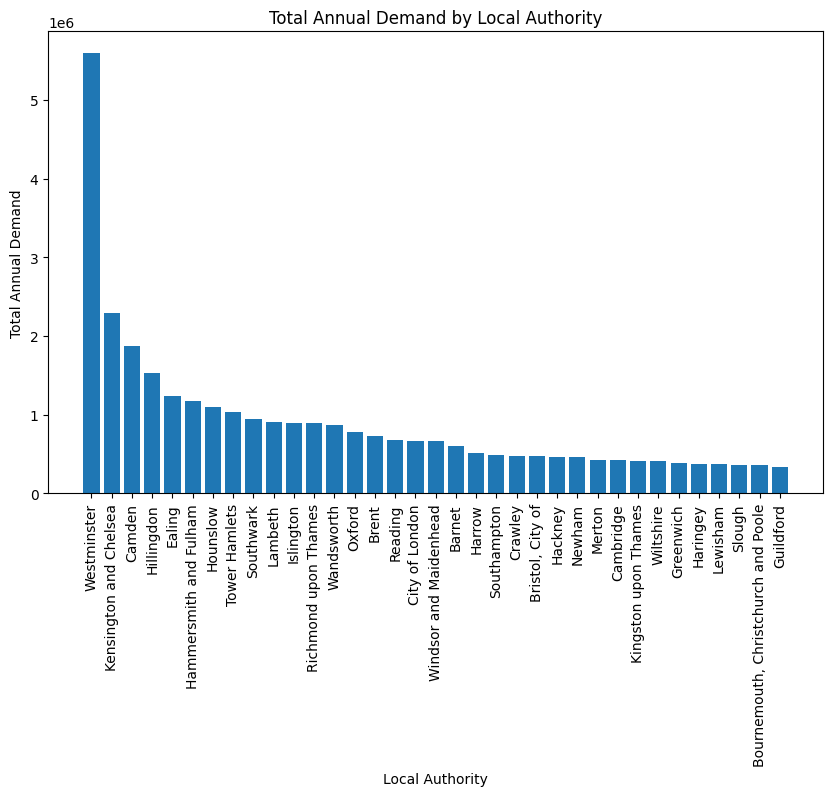

In [237]:
plt.figure(figsize=(10, 6))
plt.bar(OD_sorted["Local Auth"][0:35],OD_sorted["Total Annual Demand"][0:35])
plt.xticks(rotation=90)
plt.title('Total Annual Demand by Local Authority')
plt.xlabel('Local Authority')
plt.ylabel('Total Annual Demand')
plt.show()

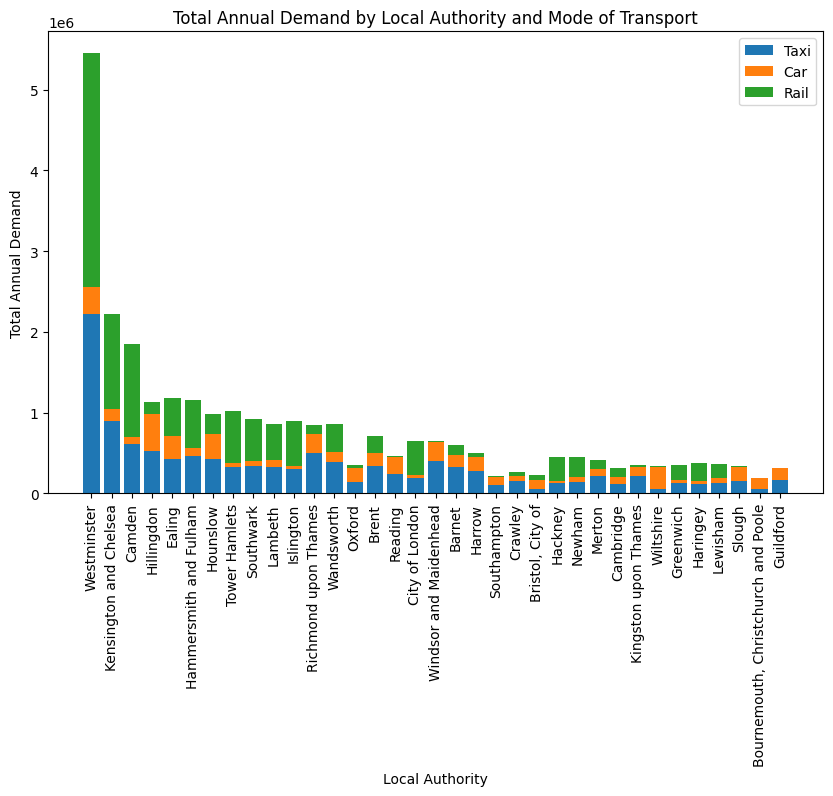

In [238]:
plt.figure(figsize=(10, 6))
plt.bar(OD_sorted["Local Auth"][0:35], OD_sorted["Taxi"][0:35], label='Taxi')
plt.bar(OD_sorted["Local Auth"][0:35], OD_sorted["Car"][0:35], bottom=OD_sorted["Taxi"][0:35], label='Car')
plt.bar(OD_sorted["Local Auth"][0:35], OD_sorted["Rail"][0:35], bottom=OD_sorted["Taxi"][0:35] + OD_sorted["Car"][0:35], label='Rail')
plt.xticks(rotation=90)
plt.title('Total Annual Demand by Local Authority and Mode of Transport')
plt.xlabel('Local Authority')
plt.ylabel('Total Annual Demand')
plt.legend()
plt.show()

In [239]:
#Grouping London Local Authorities together
London_local_authorities = [
    'Westminster', 'Wandsworth', 'Waltham Forest', 'Tower Hamlets', 'Sutton',
    'Southwark', 'Richmond upon Thames', 'Redbridge', 'Newham', 'Merton',
    'Lewisham', 'Lambeth', 'Kingston upon Thames', 'Kensington and Chelsea', 
    'Islington', 
    'Havering', 'Harrow', 'Haringey', 
    'Hammersmith and Fulham', 'Hackney', 'Greenwich', 'Enfield', 'Ealing', 
    'Croydon', 'Camden', 'Bromley', 'Brent', 'Bexley', 'Barnet', 
    'Barking and Dagenham', 'City of London'
]
#'Hounslow', 'Hillingdon', 
London_OD_sorted = OD_sorted[OD_sorted['Local Auth'].isin(London_local_authorities)]
London_indexes = OD_sorted[OD_sorted['Local Auth'].isin(London_local_authorities)].index
London_total=OD_sorted.loc[London_indexes].sum()
London_sum=London_total["Mode Share Taxi"]+London_total["Mode Share Car"]+London_total["Mode Share Rail"]
London_total["Mode Share Taxi"]=London_total["Mode Share Taxi"]/London_sum
London_total["Mode Share Car"]=London_total["Mode Share Car"]/London_sum
London_total["Mode Share Rail"]=London_total["Mode Share Rail"]/London_sum
London_total["Local Auth"]="London"
London_total = London_total.to_frame().transpose()
London_total["lng"]=-0.118092
London_total["lat"]=51.509865
London_total

,Local Auth,lat,lng,Total Annual Demand,Mode Share Taxi,Mode Share Car,Mode Share Rail,Taxi,Car,Rail
0,London,51.509865,-0.118092,25127000.0,0.391937,0.203827,0.404236,9687954.674102,3120915.284409,11560778.615464


In [240]:
#Removing London Authorities from Dataset and adding a new entry of total London
OD_noLondon=OD_sorted.drop(index=London_indexes)
OD_with_london = pd.concat([OD_noLondon, London_total], ignore_index=True)
OD_with_london.dropna()
OD_with_london=OD_with_london.sort_values(by=["Total Annual Demand"], ascending=False, ignore_index= True)

OD_with_london['Mode Share Other'] = 1- (OD_with_london['Mode Share Taxi']+OD_with_london['Mode Share Car']+OD_with_london['Mode Share Rail'])
OD_with_london['Other'] = OD_with_london['Mode Share Other'].multiply(OD_with_london['Total Annual Demand'])

OD_with_london


,Local Auth,lat,lng,Total Annual Demand,Mode Share Taxi,Mode Share Car,Mode Share Rail,Taxi,Car,Rail,Mode Share Other,Other
0,London,51.509865,-0.118092,25127000.0,0.391937,0.203827,0.404236,9687954.674102,3120915.284409,11560778.615464,0.0,0.0
1,Hillingdon,51.535183,-0.448138,1524000.0,0.34559,0.301655,0.095926,526679.24813,459722.627236,146191.254513,0.256829,391406.870121
2,Hounslow,51.470412,-0.363372,1103000.0,0.387754,0.276436,0.229551,427692.802819,304909.346612,253194.853767,0.106258,117202.996803
3,Oxford,51.752021,-1.257726,785000.0,0.171255,0.236428,0.034546,134434.786545,185595.926744,27118.861736,0.557771,437850.424975
4,Reading,51.455120,-0.978747,681000.0,0.353819,0.312628,0.015782,240950.805172,212899.347533,10747.565918,0.317771,216402.281377
...,...,...,...,...,...,...,...,...,...,...,...,...
328,Isles of Scilly,49.923252,-6.296572,1000.0,0.0,1.0,0.0,0.0,1000.0,0.0,0.0,0.0
329,South Ayrshire,55.458899,-4.629199,1000.0,0.577903,0.422097,0.0,577.903033,422.096967,0.0,0.0,0.0
330,Moray,57.649848,-3.316804,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
331,Pendle,53.869456,-2.163988,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [241]:
file_name = 'OD_with_london.xlsx'
# saving the excel
OD_with_london.to_excel(file_name)

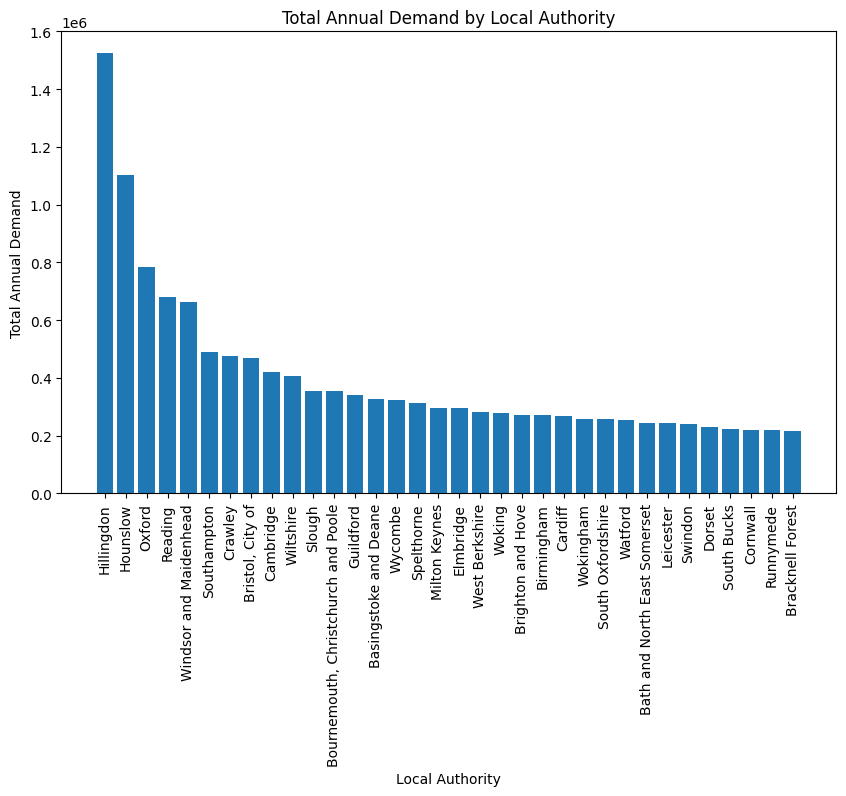

In [242]:
#Redoing plots but now with London grouped together, set index to 0 to show London, and set to 1 to not show London
plt.figure(figsize=(10, 6))
plt.bar(OD_with_london["Local Auth"][1:35],OD_with_london["Total Annual Demand"][1:35])
plt.xticks(rotation=90)
plt.title('Total Annual Demand by Local Authority')
plt.xlabel('Local Authority')
plt.ylabel('Total Annual Demand')
plt.show()

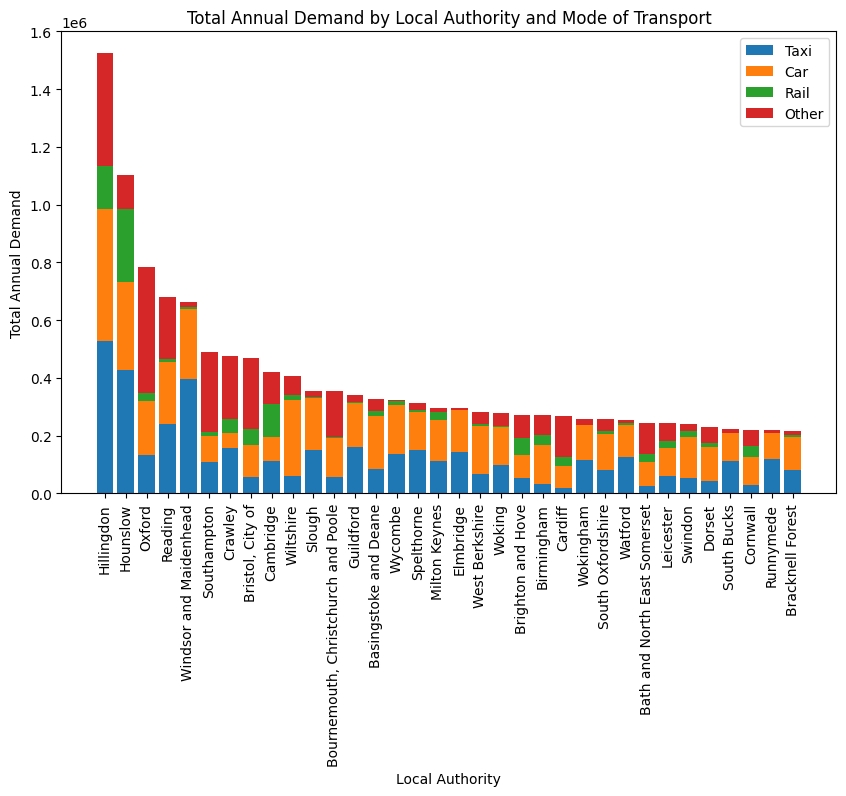

In [243]:
plt.figure(figsize=(10, 6))
plt.bar(OD_with_london["Local Auth"][1:35], OD_with_london["Taxi"][1:35], label='Taxi')
plt.bar(OD_with_london["Local Auth"][1:35], OD_with_london["Car"][1:35], bottom=OD_with_london["Taxi"][1:35], label='Car')
plt.bar(OD_with_london["Local Auth"][1:35], OD_with_london["Rail"][1:35], bottom=OD_with_london["Taxi"][1:35] + OD_with_london["Car"][1:35], label='Rail')
plt.bar(OD_with_london["Local Auth"][1:35], OD_with_london["Other"][1:35], bottom=OD_with_london["Taxi"][1:35] + OD_with_london["Car"][1:35]+OD_with_london["Rail"][1:35], label='Other')
plt.xticks(rotation=90)
plt.title('Total Annual Demand by Local Authority and Mode of Transport')
plt.xlabel('Local Authority')
plt.ylabel('Total Annual Demand')
plt.legend()
plt.show()


In [244]:
#Grouping Cars and Taxis together
OD_with_london['vehicles'] = OD_with_london['Taxi']+OD_with_london['Car']
OD_with_london = OD_with_london.drop(332)
OD_with_london['Total Annual Demand'] = OD_with_london['Total Annual Demand'].astype(float)
OD_with_london

,Local Auth,lat,lng,Total Annual Demand,Mode Share Taxi,Mode Share Car,Mode Share Rail,Taxi,Car,Rail,Mode Share Other,Other,vehicles
0,London,51.509865,-0.118092,25127000.0,0.391937,0.203827,0.404236,9687954.674102,3120915.284409,11560778.615464,0.0,0.0,12808869.958511
1,Hillingdon,51.535183,-0.448138,1524000.0,0.34559,0.301655,0.095926,526679.24813,459722.627236,146191.254513,0.256829,391406.870121,986401.875366
2,Hounslow,51.470412,-0.363372,1103000.0,0.387754,0.276436,0.229551,427692.802819,304909.346612,253194.853767,0.106258,117202.996803,732602.14943
3,Oxford,51.752021,-1.257726,785000.0,0.171255,0.236428,0.034546,134434.786545,185595.926744,27118.861736,0.557771,437850.424975,320030.713289
4,Reading,51.455120,-0.978747,681000.0,0.353819,0.312628,0.015782,240950.805172,212899.347533,10747.565918,0.317771,216402.281377,453850.152705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,Merthyr Tydfil,51.748730,-3.381646,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.0,0.0
328,Isles of Scilly,49.923252,-6.296572,1000.0,0.0,1.0,0.0,0.0,1000.0,0.0,0.0,0.0,1000.0
329,South Ayrshire,55.458899,-4.629199,1000.0,0.577903,0.422097,0.0,577.903033,422.096967,0.0,0.0,0.0,1000.0
330,Moray,57.649848,-3.316804,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
#!pip install nbformat --upgrade
""" import plotly.express as px
color_scale = [(0, '#a38bc1'), (1, '#512d60')]

fig = px.scatter_mapbox(
    OD_sorted,
    lat="lat",
    lon="lng",
    size="Total Annual Demand",
    hover_name="Local Auth",
    hover_data="Total Annual Demand",
    size_max=50,
    zoom=5,
    mapbox_style="open-street-map",
    color="Total Annual Demand",
    color_continuous_scale=color_scale
)
fig.write_html("map_all_authorities.html")
fig.show() """

' import plotly.express as px\ncolor_scale = [(0, \'#a38bc1\'), (1, \'#512d60\')]\n\nfig = px.scatter_mapbox(\n    OD_sorted,\n    lat="lat",\n    lon="lng",\n    size="Total Annual Demand",\n    hover_name="Local Auth",\n    hover_data="Total Annual Demand",\n    size_max=50,\n    zoom=5,\n    mapbox_style="open-street-map",\n    color="Total Annual Demand",\n    color_continuous_scale=color_scale\n)\nfig.write_html("map_all_authorities.html")\nfig.show() '

In [246]:
#Generalised cost stuff 
flow=pd.read_excel("Heathrow_flow_dist_time.xlsx")
taxi_cost_per_mile=2.10 #GBP ALL VALUES HERE GIVEN FOR 2024, MAY HAVE TO ADJUST FOR INFLATION
car_cost_per_mile=0.439  #including maintenance
car_petrol_per_mile=0.16
car_total_cost_per_mile=car_petrol_per_mile+car_cost_per_mile
rail_fare_per_mile=0.54
drop_off_2024=5.20
business_share=0.252 #proportions of business and pleasure travellers as this affects generalised costs
pleasure_share=0.748
vehicle_co2_per_mile=272 #in grammes
rail_co2_per_mile_per_passenger=56
trolley_co2_per_mile_per_passenger=46.4
mile_m=1609.34 #metres in mile
hour_s=3600 #seconds in hour

#Values of Time all in GBP and per hour of travel
VOT_Perceived_Rail_2024=26.94
VOT_Perceived_Car_2024=16.33
VOT_Perceived_Taxi_2024=16.33
VOT_commuting_Perceived_2010=9.95
VOT_commuting_Perceived_2024=VOT_commuting_Perceived_2010*1.493

#Seperating out the Business and Pleasure passengers, Car and Taxi are the same
VOT_avg_Rail=(VOT_commuting_Perceived_2024*pleasure_share)+(VOT_Perceived_Rail_2024*business_share)
VOT_avg_Car=(VOT_commuting_Perceived_2024*pleasure_share)+(VOT_Perceived_Car_2024*business_share)
VOT_avg_Taxi=(VOT_commuting_Perceived_2024*pleasure_share)+(VOT_Perceived_Taxi_2024*business_share)

#Emissions
cost_co2_tonne_2024=256 #GBP, Core Price
cost_co2_g_2024=cost_co2_tonne_2024/1000000
flow


,Unnamed: 0,Local Auth,Total Annual Demand,Mode Share Taxi,Mode Share Car,Mode Share Rail,lat,lng,Car Distance [m],Car Time Taken [s],Transit Distance [m],Transit Time Taken [s]
0,1,Aberdeen City,7000,0.284172,0.443765,0.272063,57.149889,-2.093753,857680.0,31637.0,872625.0,31242.0
1,2,Aberdeenshire,1000,0.000000,1.000000,0.000000,57.286872,-2.381568,879463.0,32439.0,900775.0,32152.0
2,3,Adur,13000,0.000000,0.887134,0.000000,50.834817,-0.310126,109867.0,4306.0,123156.0,9889.0
3,4,Allerdale,3000,0.000000,0.218843,0.000000,54.699064,-3.199420,499215.0,18571.0,532077.0,26474.0
4,5,Amber Valley,13000,0.000000,0.857952,0.062812,53.015187,-1.482307,217494.0,8816.0,251567.0,13219.0
...,...,...,...,...,...,...,...,...,...,...,...,...
357,358,Wychavon,33000,0.352380,0.547394,0.000000,52.152518,-2.033095,176011.0,6943.0,210714.0,12417.0
358,359,Wycombe,325000,0.423891,0.512929,0.043526,51.638511,-0.807860,36463.0,1950.0,32335.0,5204.0
359,360,Wyre,3000,0.492094,0.000000,0.507906,53.899610,-2.809301,370794.0,13998.0,429542.0,17985.0
360,361,Wyre Forest,17000,0.138131,0.809199,0.000000,52.403805,-2.253763,187111.0,7472.0,197788.0,15328.0


In [247]:
#CALCULATING CURRENT COSTS OF TRAVEL
car_fare=flow["Car Distance [m]"]*(car_total_cost_per_mile/mile_m) + drop_off_2024
taxi_fare=flow["Car Distance [m]"]*(taxi_cost_per_mile/mile_m) + drop_off_2024
rail_fare=flow["Transit Distance [m]"]*(rail_fare_per_mile/mile_m)

VOT_Car=(flow["Car Time Taken [s]"]*VOT_avg_Car) /hour_s
VOT_Taxi=VOT_Car
VOT_Rail=(flow["Transit Time Taken [s]"]*VOT_avg_Rail) /hour_s

emissions_Car=flow["Car Distance [m]"]*(vehicle_co2_per_mile/mile_m)
emissions_Taxi=emissions_Car
emissions_Rail=flow["Transit Distance [m]"]*(rail_co2_per_mile_per_passenger/mile_m)

emissions_cost_Car=cost_co2_g_2024*emissions_Car
emissions_cost_Taxi=cost_co2_g_2024*emissions_Taxi
emissions_cost_Rail=cost_co2_g_2024*emissions_Rail

GC_Car=car_fare+VOT_Car+emissions_cost_Car
GC_Taxi=taxi_fare+VOT_Taxi+emissions_cost_Taxi
GC_Rail=rail_fare+VOT_Rail+emissions_cost_Rail

GC_Current_2024 = {
  "Local Auth": flow["Local Auth"],
  "GC_Car": GC_Car,
  "GC_Taxi": GC_Taxi,
  "GC_Rail": GC_Rail,
  'lat':flow['lat'],
  'lng':flow['lng']
}

GC_Current_2024=pd.DataFrame(GC_Current_2024)
GC_Current_2024

,Local Auth,GC_Car,GC_Taxi,GC_Rail,lat,lng
0,Aberdeen City,495.355435,1295.296827,455.923134,57.149889,-2.093753
1,Aberdeenshire,507.797840,1328.055811,470.144276,57.286872,-2.381568
2,Adur,69.059547,171.530353,91.593174,50.834817,-0.310126
3,Allerdale,291.158678,756.766763,314.913163,54.699064,-3.199420
4,Amber Valley,132.851304,335.703711,152.382380,53.015187,-1.482307
...,...,...,...,...,...,...
357,Wychavon,107.694124,271.856148,134.322720,52.152518,-2.033095
358,Wycombe,28.597209,62.605537,37.014197,51.638511,-0.807860
359,Wyre,218.461173,564.293499,237.384254,53.899610,-2.809301
360,Wyre Forest,114.543355,289.058132,144.345059,52.403805,-2.253763


In [376]:
hubs=pd.read_excel("heathrowflow_with_hubs.xlsx")
#Working out Generlised costs of travel to Heathrow through the different hubs to workout the optimum
#rail route for each of the local authorities
uxb_dist=10.6 #km
uxb_time=12*60 #seconds
read_dist=(41+6.16) #km
read_time=26*60 #seconds
wok_dist=9.1 #km
wok_time=19*60 #seconds
sta_dist=4.59 #km
sta_time=6*60 #seconds #CHECK THIS !
hubs

,Unnamed: 0,Local Auth,Total Annual Demand,Mode Share Taxi,Mode Share Car,Mode Share Rail,lat,lng,Car Distance [m],Car Time Taken [s],Transit Distance [m],Transit Time Taken [s],(Reading) Transit Distance [m],(Reading) Transit Time Taken [s],(Woking) Transit Distance [m],(Woking) Transit Time Taken [s],(Uxbridge) Transit Distance [m],(Uxbridge) Transit Time Taken [s],(Staines) Transit Distance [m],(Staines) Transit Time Taken [s]
0,1,Aberdeen City,7000,0.284172,0.443765,0.272063,57.149889,-2.093753,870672.0,31956.0,872683.0,31242.0,903281.0,30900.0,883835.0,30180.0,869319.0,31020.0,877001.0,30660.0
1,2,Aberdeenshire,1000,0.000000,1.000000,0.000000,57.286872,-2.381568,892455.0,32762.0,958654.0,50919.0,996022.0,53947.0,977411.0,53233.0,964311.0,52150.0,950525.0,52345.0
2,3,Adur,13000,0.000000,0.887134,0.000000,50.834817,-0.310126,109867.0,4306.0,117775.0,10020.0,135170.0,9811.0,123325.0,7231.0,126594.0,11191.0,114512.0,7651.0
3,4,Allerdale,3000,0.000000,0.218843,0.000000,54.699064,-3.199420,512207.0,18895.0,555547.0,27984.0,586085.0,27582.0,567547.0,26922.0,522310.0,28215.0,559345.0,27402.0
4,5,Amber Valley,13000,0.000000,0.857952,0.062812,53.015187,-1.482307,217494.0,8816.0,298674.0,15564.0,237854.0,12217.0,303002.0,14562.0,289186.0,16119.0,294859.0,15582.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,358,Wychavon,33000,0.352380,0.547394,0.000000,52.152518,-2.033095,176011.0,6943.0,171498.0,12865.0,136410.0,8330.0,187915.0,13610.0,156604.0,11750.0,175620.0,11930.0
358,359,Wycombe,325000,0.423891,0.512929,0.043526,51.638511,-0.807860,36463.0,1950.0,55544.0,5297.0,85510.0,7240.0,73764.0,9283.0,53465.0,4120.0,41901.0,8107.0
359,360,Wyre,3000,0.492094,0.000000,0.507906,53.899610,-2.809301,383786.0,14322.0,429017.0,19520.0,459396.0,18278.0,440958.0,17498.0,427624.0,19611.0,432815.0,18278.0
360,361,Wyre Forest,17000,0.138131,0.809199,0.000000,52.403805,-2.253763,187218.0,7534.0,248381.0,15971.0,192484.0,12051.0,260322.0,14369.0,212403.0,15591.0,252179.0,15389.0


In [431]:
#Calculating distances and times to Heathrow through new hubs
dist_via_reading=hubs["(Reading) Transit Distance [m]"]+(read_dist*1000)
dist_via_woking=hubs["(Woking) Transit Distance [m]"]+(wok_dist*1000)
dist_via_uxbridge=hubs["(Uxbridge) Transit Distance [m]"]+(uxb_dist*1000)
dist_via_staines=hubs["(Staines) Transit Distance [m]"]+(sta_dist*1000)

time_via_reading=hubs["(Reading) Transit Time Taken [s]"]+read_time
time_via_woking=hubs["(Woking) Transit Time Taken [s]"]+wok_time
time_via_uxbridge=hubs["(Uxbridge) Transit Time Taken [s]"]+uxb_time
time_via_staines=hubs["(Staines) Transit Time Taken [s]"]+sta_time

#Creating a dataframe with all the Rail times for comparison
All_Rail_Times = {
    "Local Auth": flow["Local Auth"],
    "Via Reading Time": time_via_reading,
    "Via Woking Time": time_via_woking,
    "Via Uxbridge Time": time_via_uxbridge,
    "Via Staines Time": time_via_staines,
    "Old Rail Time": hubs["Transit Time Taken [s]"]
}
All_Rail_Times=pd.DataFrame(All_Rail_Times)
All_Rail_Times

,Local Auth,Via Reading Time,Via Woking Time,Via Uxbridge Time,Via Staines Time,Old Rail Time
0,Aberdeen City,32460.0,31320.0,31740.0,31020.0,31242.0
1,Aberdeenshire,55507.0,54373.0,52870.0,52705.0,50919.0
2,Adur,11371.0,8371.0,11911.0,8011.0,10020.0
3,Allerdale,29142.0,28062.0,28935.0,27762.0,27984.0
4,Amber Valley,13777.0,15702.0,16839.0,15942.0,15564.0
...,...,...,...,...,...,...
357,Wychavon,9890.0,14750.0,12470.0,12290.0,12865.0
358,Wycombe,8800.0,10423.0,4840.0,8467.0,5297.0
359,Wyre,19838.0,18638.0,20331.0,18638.0,19520.0
360,Wyre Forest,13611.0,15509.0,16311.0,15749.0,15971.0


In [426]:
#Working out the Generalised Costs of travel through the hubs
GC_Reading=((time_via_reading*VOT_avg_Rail)/hour_s) + (dist_via_reading*rail_co2_per_mile_per_passenger*cost_co2_g_2024/mile_m) + (dist_via_reading*rail_fare_per_mile/mile_m)
GC_Woking=((time_via_woking*VOT_avg_Rail)/hour_s) + (dist_via_woking*rail_co2_per_mile_per_passenger*cost_co2_g_2024/mile_m) + (dist_via_woking*rail_fare_per_mile/mile_m)
GC_Uxbridge=((time_via_uxbridge*VOT_avg_Rail)/hour_s) + (dist_via_uxbridge*rail_co2_per_mile_per_passenger*cost_co2_g_2024/mile_m) + (dist_via_uxbridge*rail_fare_per_mile/mile_m)
GC_Staines=((time_via_staines*VOT_avg_Rail)/hour_s) + (dist_via_staines*rail_co2_per_mile_per_passenger*cost_co2_g_2024/mile_m) + (dist_via_staines*rail_fare_per_mile/mile_m)

GC_hubs_2024 = {
    "Local Auth": flow["Local Auth"],
    "GC_Direct": GC_Rail,
    "GC_Reading": GC_Reading,
    "GC_Woking": GC_Woking,
    "GC_Uxbridge": GC_Uxbridge,
    "GC_Staines": GC_Staines
}
GC_hubs_2024=pd.DataFrame(GC_hubs_2024)
GC_hubs_2024

,Local Auth,GC_Direct,GC_Reading,GC_Woking,GC_Uxbridge,GC_Staines
0,Aberdeen City,455.923134,488.783197,463.306747,460.911808,457.907591
1,Aberdeenshire,470.144276,635.326937,610.167938,598.698791,591.059625
2,Adur,91.593174,119.344729,87.237753,106.482769,80.858587
3,Allerdale,314.913163,363.026802,338.161457,327.437194,332.291094
4,Amber Valley,152.382380,166.677781,185.580115,186.991510,182.415178
...,...,...,...,...,...,...
357,Wychavon,134.322720,112.407705,141.204746,119.599270,123.184143
358,Wycombe,37.014197,89.455308,80.369891,46.133615,58.115200
359,Wyre,237.384254,273.125550,247.697960,252.040041,243.339644
360,Wyre Forest,144.345059,150.224697,169.919345,157.918228,166.754407


In [434]:
#Calculating the time savings with the new rail routes
rail_best_time=All_Rail_Times[["Via Reading Time", "Via Woking Time", "Via Uxbridge Time", "Via Staines Time", "Old Rail Time"]].min(axis=1)

#Calculating which rail route has the best generalised cost
GC_bestrail=GC_hubs_2024[["GC_Direct","GC_Reading","GC_Woking","GC_Uxbridge","GC_Staines"]].min(axis=1)
route_best=GC_hubs_2024[["GC_Direct","GC_Reading","GC_Woking","GC_Uxbridge","GC_Staines"]].idxmin(axis=1)
Rail_routes= {
    "Local Auth":flow["Local Auth"],
    'lat':flow['lat'],
    'lng':flow['lng'],
    "Best Route":route_best,
    "GC of Best Rail Route":GC_bestrail,
    "Time of Best Rail Route":rail_best_time
}
Rail_routes=pd.DataFrame(Rail_routes)
Rail_routes

C:\Users\nakon\AppData\Local\Temp\ipykernel_36240\2938103495.py:6: FutureWarning:

The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError



,Local Auth,lat,lng,Best Route,GC of Best Rail Route,Time of Best Rail Route
0,Aberdeen City,57.149889,-2.093753,GC_Direct,455.923134,31020.0
1,Aberdeenshire,57.286872,-2.381568,GC_Direct,470.144276,50919.0
2,Adur,50.834817,-0.310126,GC_Staines,80.858587,8011.0
3,Allerdale,54.699064,-3.199420,GC_Direct,314.913163,27762.0
4,Amber Valley,53.015187,-1.482307,GC_Direct,152.382380,13777.0
...,...,...,...,...,...,...
357,Wychavon,52.152518,-2.033095,GC_Reading,112.407705,9890.0
358,Wycombe,51.638511,-0.807860,GC_Direct,37.014197,4840.0
359,Wyre,53.899610,-2.809301,GC_Direct,237.384254,18638.0
360,Wyre Forest,52.403805,-2.253763,GC_Direct,144.345059,13611.0


In [406]:
GC_new_routes_2024=flow[["Local Auth",	"Total Annual Demand",	"Mode Share Taxi",	"Mode Share Car",	"Mode Share Rail",	"lat",	"lng"]]

GC_new_routes_2024['GC Car']=GC_Car
GC_new_routes_2024['GC Taxi']=GC_Taxi
GC_new_routes_2024['GC Old Rail']=GC_Rail
GC_new_routes_2024['GC New Rail']=GC_bestrail
GC_new_routes_2024['Best Rail Route']=route_best

GC_new_routes_2024

C:\Users\nakon\AppData\Local\Temp\ipykernel_36240\4170352044.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nakon\AppData\Local\Temp\ipykernel_36240\4170352044.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nakon\AppData\Local\Temp\ipykernel_36240\4170352044.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Local Auth,Total Annual Demand,Mode Share Taxi,Mode Share Car,Mode Share Rail,lat,lng,GC Car,GC Taxi,GC Old Rail,GC New Rail,Best Rail Route
0,Aberdeen City,7000,0.284172,0.443765,0.272063,57.149889,-2.093753,495.355435,1295.296827,455.923134,455.923134,GC_Direct
1,Aberdeenshire,1000,0.000000,1.000000,0.000000,57.286872,-2.381568,507.797840,1328.055811,470.144276,470.144276,GC_Direct
2,Adur,13000,0.000000,0.887134,0.000000,50.834817,-0.310126,69.059547,171.530353,91.593174,80.858587,GC_Staines
3,Allerdale,3000,0.000000,0.218843,0.000000,54.699064,-3.199420,291.158678,756.766763,314.913163,314.913163,GC_Direct
4,Amber Valley,13000,0.000000,0.857952,0.062812,53.015187,-1.482307,132.851304,335.703711,152.382380,152.382380,GC_Direct
...,...,...,...,...,...,...,...,...,...,...,...,...
357,Wychavon,33000,0.352380,0.547394,0.000000,52.152518,-2.033095,107.694124,271.856148,134.322720,112.407705,GC_Reading
358,Wycombe,325000,0.423891,0.512929,0.043526,51.638511,-0.807860,28.597209,62.605537,37.014197,37.014197,GC_Direct
359,Wyre,3000,0.492094,0.000000,0.507906,53.899610,-2.809301,218.461173,564.293499,237.384254,237.384254,GC_Direct
360,Wyre Forest,17000,0.138131,0.809199,0.000000,52.403805,-2.253763,114.543355,289.058132,144.345059,144.345059,GC_Direct


In [442]:
 #Finding the overall best way to travel
GC_overallbest=GC_new_routes_2024[["GC Car","GC Taxi","GC Old Rail","GC New Rail"]].min(axis=1)
mode_overallbest=GC_new_routes_2024[["GC Car","GC Taxi","GC Old Rail","GC New Rail"]].idxmin(axis=1)

GC_new_routes_2024['Best GC overall']=GC_overallbest
GC_new_routes_2024['Best Route']=mode_overallbest
GC_new_routes_2024['Rail GC Saved']=GC_new_routes_2024['GC Old Rail']-GC_new_routes_2024['GC New Rail']
GC_new_routes_2024['Rail time saved in minutes']=(hubs['Transit Time Taken [s]']-rail_best_time)/60

GC_new_routes_2024.to_excel('New Routes 2024.csv')
GC_new_routes_2024



,Local Auth,Total Annual Demand,Mode Share Taxi,Mode Share Car,Mode Share Rail,lat,lng,GC Car,GC Taxi,GC Old Rail,GC New Rail,Best Rail Route,Best GC overall,Best Route,Rail GC Saved,Rail time saved in minutes
0,Aberdeen City,7000,0.284172,0.443765,0.272063,57.149889,-2.093753,495.355435,1295.296827,455.923134,455.923134,GC_Direct,455.923134,GC Old Rail,0.000000,3.700000
1,Aberdeenshire,1000,0.000000,1.000000,0.000000,57.286872,-2.381568,507.797840,1328.055811,470.144276,470.144276,GC_Direct,470.144276,GC Old Rail,0.000000,0.000000
2,Adur,13000,0.000000,0.887134,0.000000,50.834817,-0.310126,69.059547,171.530353,91.593174,80.858587,GC_Staines,69.059547,GC Car,10.734586,33.483333
3,Allerdale,3000,0.000000,0.218843,0.000000,54.699064,-3.199420,291.158678,756.766763,314.913163,314.913163,GC_Direct,291.158678,GC Car,0.000000,3.700000
4,Amber Valley,13000,0.000000,0.857952,0.062812,53.015187,-1.482307,132.851304,335.703711,152.382380,152.382380,GC_Direct,132.851304,GC Car,0.000000,29.783333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Wychavon,33000,0.352380,0.547394,0.000000,52.152518,-2.033095,107.694124,271.856148,134.322720,112.407705,GC_Reading,107.694124,GC Car,21.915015,49.583333
358,Wycombe,325000,0.423891,0.512929,0.043526,51.638511,-0.807860,28.597209,62.605537,37.014197,37.014197,GC_Direct,28.597209,GC Car,0.000000,7.616667
359,Wyre,3000,0.492094,0.000000,0.507906,53.899610,-2.809301,218.461173,564.293499,237.384254,237.384254,GC_Direct,218.461173,GC Car,0.000000,14.700000
360,Wyre Forest,17000,0.138131,0.809199,0.000000,52.403805,-2.253763,114.543355,289.058132,144.345059,144.345059,GC_Direct,114.543355,GC Car,0.000000,39.333333
